In [1]:
# ! pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.covariance import MinCovDet
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t, f, chi2
%matplotlib inline

$\textbf{Empirical Exercise-Week 9}$  Econometric analysis of stock market dynamics. File: shanghai.csv. Text:p. 632, 14.36  We also show how to import data from Yahoo.  We also compare the GARCH conditional volatility estimate with the VIX, a measure of the stock-price volatility obtained from 30-day moving averages. 

In [2]:
Tab1 = pd.read_csv('shanghai.csv')

In [3]:
date1 = np.array(Tab1.iloc[:,0]); returns = np.array(Tab1.iloc[:,1])
date1

array(['7/7/1995', '7/10/1995', '7/11/1995', ..., '4/30/2015', '5/4/2015',
       '5/5/2015'], dtype=object)

In [4]:
print(returns.shape)

(5064,)


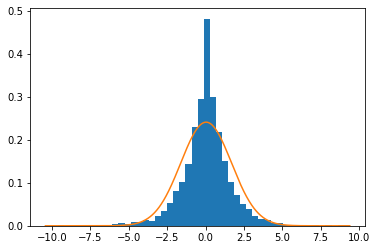

In [5]:
from scipy.stats import norm
plt.hist(returns,density=True,bins=50)
minr=min(returns)
maxr=max(returns)
xarray=np.linspace(minr,maxr,len(returns))
yarray=norm.pdf(xarray,np.mean(returns),np.std(returns,ddof=1))
plt.plot(xarray,yarray)

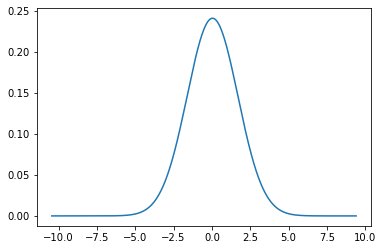

In [6]:
xarray=np.linspace(minr,maxr,len(returns))
yarray=norm.pdf(xarray,np.mean(returns),np.std(returns,ddof=1))
plt.plot(xarray,yarray)

Notice the excess kurtosis and fat tails (skewness)

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

x = date1;
y = returns;





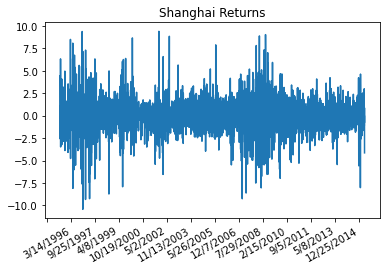

In [8]:
fig, ax = plt.subplots()
ax.plot(date1, returns)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Shanghai Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
plt.show()

In [9]:
from scipy import stats
[jbvalue, pval]= stats.jarque_bera(returns)

In [10]:
[jbvalue, pval] #jbvalue is the test statistic

[5586.516034875546, 0.0]

Reject normality hypothesis for returns.

Since Python doesn't have corresponding arch models as Matlab. The Matlab notebook is better for reference.

In [11]:
from arch import arch_model
help(arch_model)


Help on function arch_model in module arch.univariate.mean:

arch_model(y: 'Optional[ArrayLike]', x: 'Optional[ArrayLike]' = None, mean: "Literal['Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero']" = 'Constant', lags: 'Union[None, int, List[int], Int32Array, Int64Array]' = 0, vol: "Literal['GARCH', 'ARCH', 'EGARCH', 'FIARCH', 'APARCH', 'HARCH']" = 'GARCH', p: 'Union[int, List[int]]' = 1, o: 'int' = 0, q: 'int' = 1, power: 'float' = 2.0, dist: "Literal['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error']" = 'normal', hold_back: 'Optional[int]' = None, rescale: 'Optional[bool]' = None) -> 'HARX'
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name of the mean 

In [12]:
EstMdl = arch_model(100*returns, vol='Garch', p=1,q=1).fit()
EstMdl.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40052.295670062485
Iteration:      2,   Func. Count:     12,   Neg. LLF: 34608.93159572264
Iteration:      3,   Func. Count:     18,   Neg. LLF: 40090.07802850095
Iteration:      4,   Func. Count:     24,   Neg. LLF: 32660.29747072907
Iteration:      5,   Func. Count:     31,   Neg. LLF: 32513.693703976158
Iteration:      6,   Func. Count:     37,   Neg. LLF: 32475.491760839068
Iteration:      7,   Func. Count:     42,   Neg. LLF: 32475.456435626278
Iteration:      8,   Func. Count:     47,   Neg. LLF: 32475.454748382606
Iteration:      9,   Func. Count:     52,   Neg. LLF: 32475.44380825662
Iteration:     10,   Func. Count:     57,   Neg. LLF: 32475.383105210203
Iteration:     11,   Func. Count:     62,   Neg. LLF: 32475.06248847199
Iteration:     12,   Func. Count:     67,   Neg. LLF: 32473.43745396291
Iteration:     13,   Func. Count:     72,   Neg. LLF: 32468.437787335744
Iteration:     14,   Func. Count:     77,   Neg. LLF: 324

C:\Users\mcnel\anaconda4\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.737e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -32468.1
Distribution:                  Normal   AIC:                           64944.3
Method:            Maximum Likelihood   BIC:                           64970.4
                                        No. Observations:                 5064
Date:                Mon, Mar 28 2022   Df Residuals:                     5063
Time:                        20:34:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.7009      1.977      1.366      0.172 [ -1.174,  6.576]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        273.3959    122.026      2.240  2.506e-02   [ 34.229,5.126e+02]
alpha[1]       0.0617  1.385e-02      4.459  8.223e-06 [3.461e-02,8.888e-02]
beta[1]        0.9295  1.734e-02     53.599      0.000     [  0.896,  0.964]
============================================================================

Covariance estimator: robust
"""

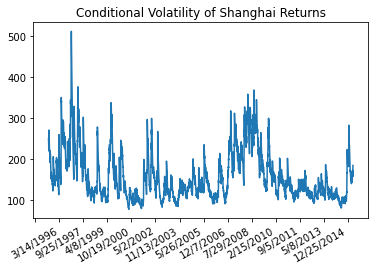

In [15]:
forecasts = EstMdl.forecast(start = 0, method='simulation',reindex=True)
#forecasts.variance.plot()
hh = forecasts.variance;
hh = (hh**.5)
fig, ax = plt.subplots()
ax.plot(date1, hh)
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Conditional Volatility of Shanghai Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
plt.show()

In [16]:
EstMdl2 = arch_model(returns, p=1, q=1, o=1, vol='Garch').fit()
EstMdl2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 31712.297370567278
Iteration:      2,   Func. Count:     17,   Neg. LLF: 10730182.61193074
Iteration:      3,   Func. Count:     25,   Neg. LLF: 11045.933674565247
Iteration:      4,   Func. Count:     34,   Neg. LLF: 11880.965670557849
Iteration:      5,   Func. Count:     41,   Neg. LLF: 9435.615701507068
Iteration:      6,   Func. Count:     48,   Neg. LLF: 10144.985066956535
Iteration:      7,   Func. Count:     55,   Neg. LLF: 9154.99290054631
Iteration:      8,   Func. Count:     62,   Neg. LLF: 9709.563531768927
Iteration:      9,   Func. Count:     70,   Neg. LLF: 9157.415868804484
Iteration:     10,   Func. Count:     77,   Neg. LLF: 9152.210409910536
Iteration:     11,   Func. Count:     84,   Neg. LLF: 9145.187012548822
Iteration:     12,   Func. Count:     90,   Neg. LLF: 9145.186637046203
Iteration:     13,   Func. Count:     96,   Neg. LLF: 9145.186588521497
Iteration:     14,   Func. Count:    102,   Neg. LLF: 9145.18

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -9145.19
Distribution:                  Normal   AIC:                           18300.4
Method:            Maximum Likelihood   BIC:                           18333.0
                                        No. Observations:                 5064
Date:                Mon, Mar 28 2022   Df Residuals:                     5063
Time:                        20:35:41   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0192  1.962e-02      0.977      0.329 [-1.929e-02,5.760e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0274  1.203e-02      2.279  2.268e-02  [3.837e-03,5.100e-02]
alpha[1]       0.0540  1.249e-02      4.321  1.555e-05  [2.949e-02,7.845e-02]
gamma[1]       0.0153  1.102e-02      1.384      0.166 [-6.348e-03,3.686e-02]
beta[1]        0.9296  1.689e-02     55.033      0.000      [  0.896,  0.963]
=============================================================================

Covariance estimator: robust
"""

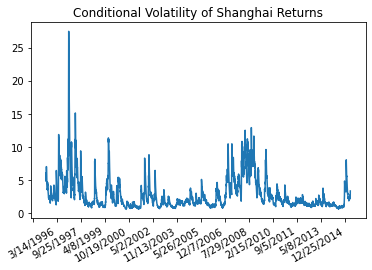

In [17]:
forecasts2 = EstMdl2.forecast(start = 0, method='simulation',reindex=True)
hh2 = forecasts2.variance
fig, ax = plt.subplots()
ax.plot(date1, hh2)
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Conditional Volatility of Shanghai Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
plt.show()

#plt.plot(range(5064), forecasts.variance)
#plt.plot(range(5064), forecasts2.variance)
#plt.show()

Confidence intervals under the two estimates

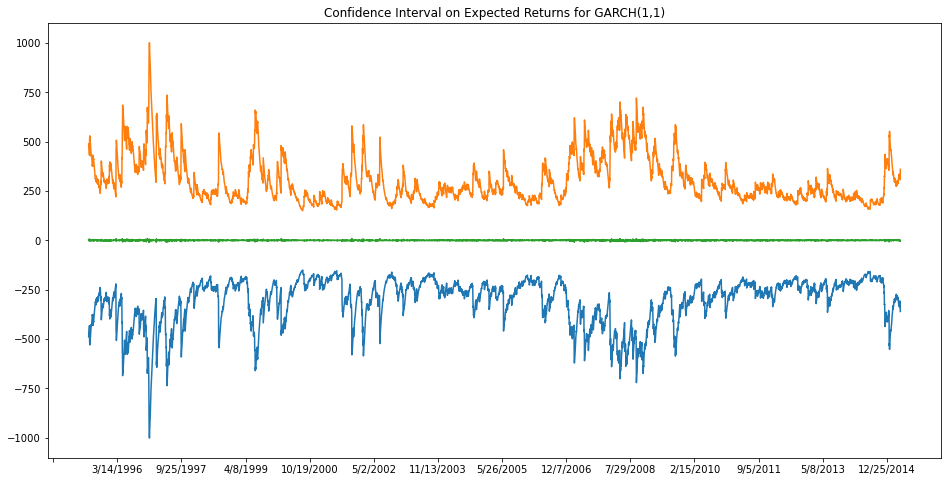

In [18]:
V = forecasts.variance
V2 = forecasts2.variance
ymean1 = np.mean(returns) - 1.96 * V**0.5
ymean2 = np.mean(returns) + 1.96 * V**0.5
plt.figure(figsize=(16,8))
plt.plot(date1, ymean1)
plt.plot(date1, ymean2)
plt.plot(date1, returns)
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
plt.title('Confidence Interval on Expected Returns for GARCH(1,1)')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
fig.autofmt_xdate()
plt.show()






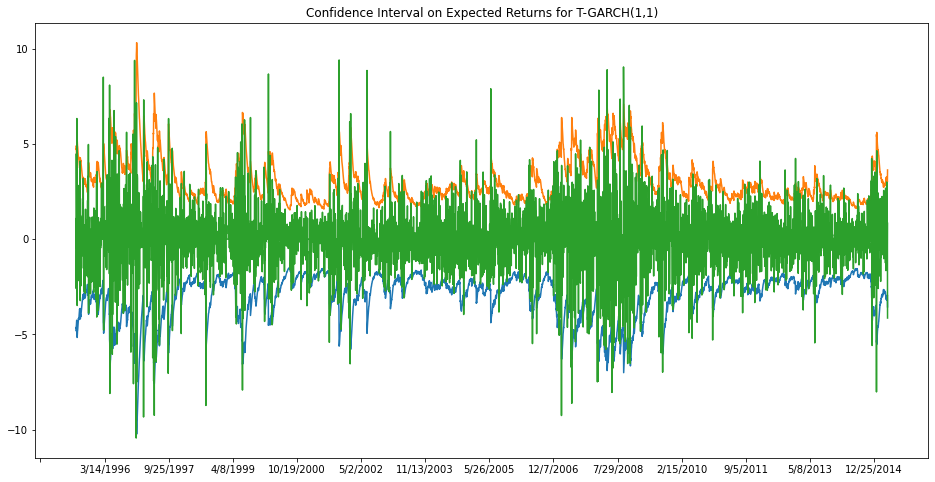

In [19]:
ymean1 = np.mean(returns) - 1.96 * V2**0.5
ymean2 = np.mean(returns) + 1.96 * V2**0.5
plt.figure(figsize=(16,8))
plt.plot(date1, ymean1)
plt.plot(date1, ymean2)
plt.plot(date1, returns)
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
plt.title('Confidence Interval on Expected Returns for T-GARCH(1,1)')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))
fig.autofmt_xdate()
plt.show()

In [21]:
# ! pip install yfinance
import yfinance as yf
SPX = yf.download('^GSPC', start = '2000-01-01', interval = '1d')  # S&P 500
CAC = yf.download('^FCHI', start = '2000-01-01', interval = '1d')  # Paris Exchange
VIX = yf.download('^VIX', start = '2000-01-01', interval = '1d')   # VIX

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
SPX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2022-03-22,4469.100098,4522.000000,4469.100098,4511.609863,4511.609863,3962880000
2022-03-23,4493.100098,4501.069824,4455.810059,4456.240234,4456.240234,4014360000
2022-03-24,4469.979980,4520.580078,4465.169922,4520.160156,4520.160156,3573430000


In [23]:
SPX_date= SPX.index.to_frame().reset_index(drop=True)
SPXclose = SPX.iloc[:,4]
SPXreturn =np.log(SPXclose) - np.log(SPXclose).shift(1)
SPXreturn.replace([np.inf, -np.inf], np.nan, inplace=True)
SPXreturn.fillna(0)
SPXreturn.replace(np.nan, 0)
#SPXreturn = np.array(SPXreturn);
np.mean(SPXreturn)


0.00020478428422041802

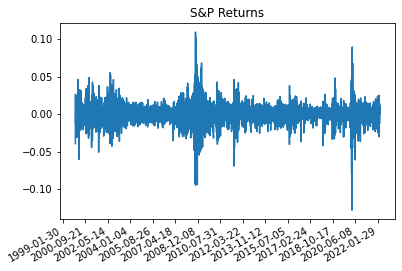

In [24]:
fig, ax = plt.subplots()
ax.plot(SPX_date, SPXreturn)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('S&P Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=600))
plt.show()

In [25]:
np.mean(SPXreturn)

SPXreturn1 = np.array(SPXreturn)
SPXreturn1 = np.delete(SPXreturn1,0,0)
SPXreturn1

array([-0.03909918,  0.00192034,  0.00095522, ...,  0.01424201,
        0.00505338,  0.00711955])

In [26]:
EstMdl3 = arch_model(SPXreturn1*100, vol='Garch', p=1,q=1).fit()
EstMdl3.summary()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 24137213518.00393
Iteration:      2,   Func. Count:     15,   Neg. LLF: 124822174.4680062
Iteration:      3,   Func. Count:     22,   Neg. LLF: 10871.081318665882
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7849.966778753953
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7736.917432485373
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8039.30914392694
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7714.418319947197
Iteration:      8,   Func. Count:     53,   Neg. LLF: 7687.426232332196
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7687.2007011526475
Iteration:     10,   Func. Count:     63,   Neg. LLF: 7687.198750965438
Iteration:     11,   Func. Count:     68,   Neg. LLF: 7687.198742453943
Iteration:     12,   Func. Count:     72,   Neg. LLF: 7687.1987424555755
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7687.198742453943
            Iterations: 12

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7687.20
Distribution:                  Normal   AIC:                           15382.4
Method:            Maximum Likelihood   BIC:                           15408.9
                                        No. Observations:                 5594
Date:                Mon, Mar 28 2022   Df Residuals:                     5593
Time:                        20:38:44   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0603  1.081e-02      5.576  2.467e-08 [3.909e-02,8.147e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0242  5.064e-03      4.774  1.806e-06 [1.425e-02,3.410e-02]
alpha[1]       0.1259  1.323e-02      9.516  1.795e-21     [  0.100,  0.152]
beta[1]        0.8568  1.359e-02     63.055      0.000     [  0.830,  0.883]
============================================================================

Covariance estimator: robust
"""

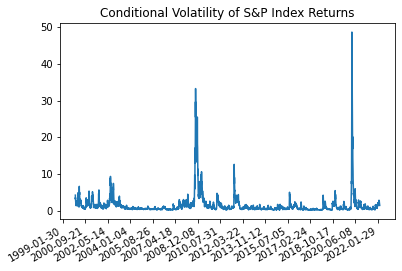

In [28]:
forecasts3 = EstMdl3.forecast(start = 0, method='simulation',reindex=True)
hh3 = forecasts3.variance
fig, ax = plt.subplots()
SPX_date = np.array(SPX_date)
SPX_date1 = np.delete(SPX_date,0,0)
SPX_date1 = np.array(SPX_date1)
ax.plot(SPX_date1, hh3)
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%Y')
ax.set_title('Conditional Volatility of S&P Index Returns')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=600))
plt.show()

Text(0.5, 1.0, 'GARCH(1,1) process for S&P and VIX')

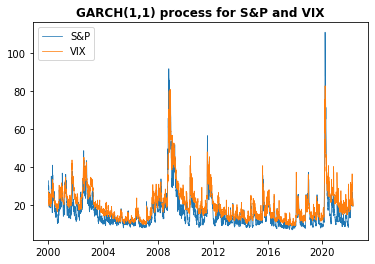

In [29]:
# Transforming data to pandas dataframe
    # + Annualizing volatilities
    # + Indexing by date
hh3=  np.sqrt(hh3*252)
hh4= pd.DataFrame(hh3)
index = SPX.index[1:]
# Plotting the data
len(hh3)
len(index)
plt.plot(index, hh4, label = 'S&P', linewidth=.75)
plt.plot(VIX.Close, label = 'VIX', linewidth = .75)
plt.legend()
plt.title('GARCH(1,1) process for S&P and VIX', fontweight = 'bold')




In [52]:
SPX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2022-03-22,4469.100098,4522.000000,4469.100098,4511.609863,4511.609863,3962880000
2022-03-23,4493.100098,4501.069824,4455.810059,4456.240234,4456.240234,4014360000
2022-03-24,4469.979980,4520.580078,4465.169922,4520.160156,4520.160156,3573430000


In [62]:
def rangefun(Data):
    data = np.log(Data);
    open = data.iloc[:,0];
    high =  data.iloc[:,1];
    low = data.iloc[:,2];
    close = data.iloc[:,3];
    rangevol =  .511*(high-low)**2-.019*((close-open)* (high+low-2*open)-2*(high-open)*(low-open))-.383*(close-open)**2
    rangevol = 100 * rangevol
    return rangevol

In [63]:
Data=  SPX.iloc[:,0:4]
Data
RangeVol = rangefun(Data)

In [64]:
RangeVol1 = (RangeVol*252)**.5
RangeVol1

Date
2000-01-03    2.904776
2000-01-04    2.373087
2000-01-05    2.863375
2000-01-06    1.584931
2000-01-07    1.822547
                ...   
2022-03-22    0.929919
2022-03-23    0.787578
2022-03-24    0.830567
2022-03-25    1.028205
2022-03-28    1.223023
Length: 5595, dtype: float64

In [65]:
index1 = SPX.index

Text(0.5, 1.0, 'GARCH Conditional Volatility and Implied Volatility (VIX)')

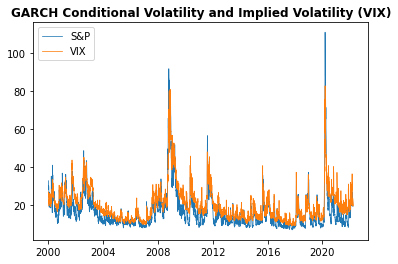

In [66]:
plt.plot(index, hh4, label = 'S&P', linewidth=.75)
plt.plot(VIX.Close, label = 'VIX', linewidth = .75)
plt.legend()
plt.title('GARCH Conditional Volatility and Implied Volatility (VIX)', fontweight = 'bold')

Text(0.5, 1.0, 'Range Volatility for S&P')

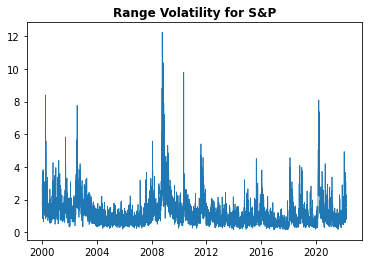

In [67]:
plt.plot(index1, RangeVol1, label = 'S&P Range Volatility', linewidth=.75)
plt.title('Range Volatility for S&P', fontweight = 'bold')